# 2. Exploring relationships through visualisations

### This script contains:

1. Import libraries
2. Import data
3. Exploring relationships
    <br>3.1 Correlations
    <br>3.2 Scatterplots
    <br>3.3 Pair plots
    <br>3.4 Categorical plots
4. Answers to initial questions
5. New questions to investigate
6. Potential hypotheses
7. Export dataframe

# Import libraries

In [1]:
# import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
# ensures the charts are displayed in the notebook without having to call them

%matplotlib inline

# Import data

In [3]:
# file path

path = r'C:\Users\Odette\Desktop\CareerFoundry\Immersion Courses\Course 6\02 Data'

In [4]:
# import partial suicide data set

df = pd.read_csv(os.path.join(path, 'Prepared Data', 'Suicide_clean.csv'), index_col = False)

In [5]:
df.head()

,Region Code,Region,Country Code,Country,Year,Sex,"Suicide Rates per 100,000",Female Population,Male Population,Total Population,Unemployment Percentage,GDP (Current US$)
0,AMR,Americas,BRB,Barbados,2019,Female,0.16,148208,138813,287021,10.10,5.209000e+09
1,AMR,Americas,BRB,Barbados,2019,Both sexes,0.31,148208,138813,287021,10.10,5.209000e+09
2,AMR,Americas,BRB,Barbados,2019,Male,0.49,148208,138813,287021,10.10,5.209000e+09
3,AMR,Americas,VCT,Saint Vincent and the Grenadines,2019,Female,0.67,54496,56097,110593,18.62,8.250407e+08
4,AMR,Americas,VCT,Saint Vincent and the Grenadines,2019,Both sexes,1.01,54496,56097,110593,18.62,8.250407e+08


In [6]:
# create a subset excluding the Region Code, Country Code & Year columns

sub = df[['Region', 'Country', 'Sex', 'Suicide Rates per 100,000', 'Female Population', 'Male Population', 'Total Population', 'Unemployment Percentage', 'GDP (Current US$)']]

In [7]:
sub.head()

,Region,Country,Sex,"Suicide Rates per 100,000",Female Population,Male Population,Total Population,Unemployment Percentage,GDP (Current US$)
0,Americas,Barbados,Female,0.16,148208,138813,287021,10.10,5.209000e+09
1,Americas,Barbados,Both sexes,0.31,148208,138813,287021,10.10,5.209000e+09
2,Americas,Barbados,Male,0.49,148208,138813,287021,10.10,5.209000e+09
3,Americas,Saint Vincent and the Grenadines,Female,0.67,54496,56097,110593,18.62,8.250407e+08
4,Americas,Saint Vincent and the Grenadines,Both sexes,1.01,54496,56097,110593,18.62,8.250407e+08


# Exploring relationships

### Correlations

In [8]:
sub.corr()

,"Suicide Rates per 100,000",Female Population,Male Population,Total Population,Unemployment Percentage,GDP (Current US$)
"Suicide Rates per 100,000",1.000000,-0.025524,-0.026127,-0.025838,0.182967,-0.008727
Female Population,-0.025524,1.000000,0.999515,0.999871,-0.089599,0.548327
Male Population,-0.026127,0.999515,1.000000,0.999886,-0.087759,0.532540
Total Population,-0.025838,0.999871,0.999886,1.000000,-0.088662,0.540261
Unemployment Percentage,0.182967,-0.089599,-0.087759,-0.088662,1.000000,-0.068161
GDP (Current US$),-0.008727,0.548327,0.532540,0.540261,-0.068161,1.000000


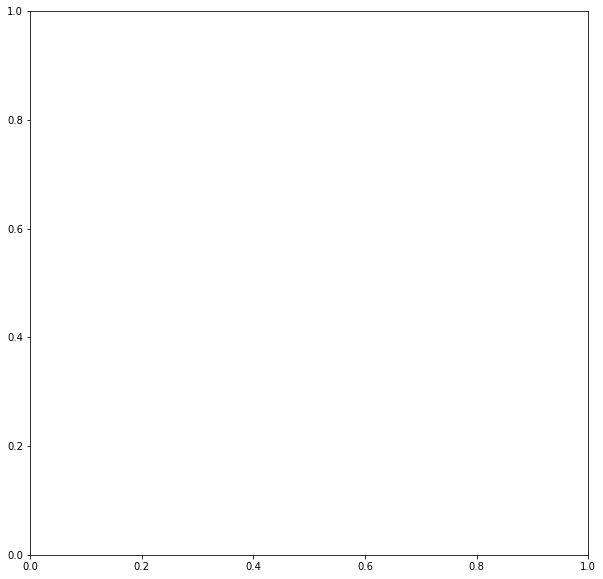

In [9]:
# create a subplot with matplotlib

f,ax = plt.subplots(figsize=(10,10))

In [10]:
# create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.

corr = sns.heatmap(sub.corr(), annot = True, ax = ax) 

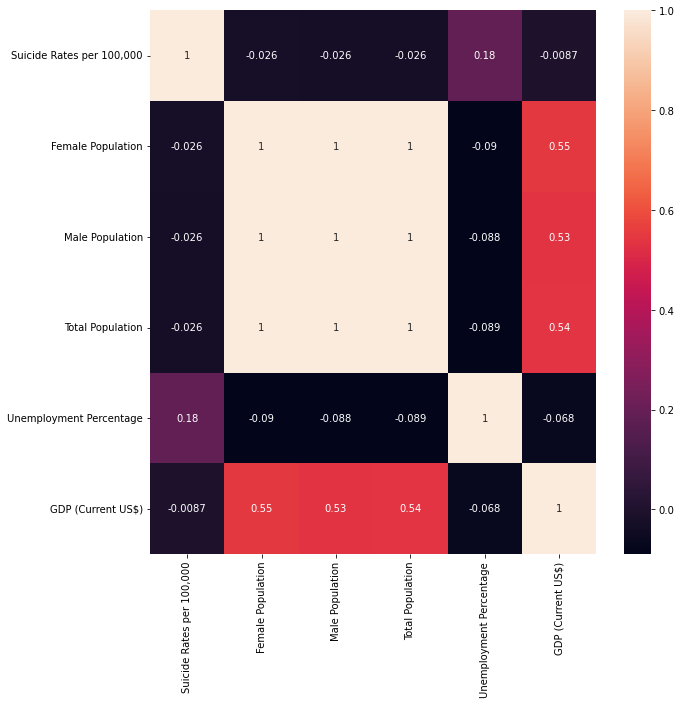

In [11]:
corr.figure

Most of the variables have negative correlations with each other, indicated by all the black squares. Unemployment % & Suicide rates have a weak positive relationship of 0.18. The most prominent relationships are the population variables (Female, Male & Total) with GDP, all having a coeffient of ~0.5, indicating a medium strong positive relationship. This possibly indicates that as the population increases, so does a countries GDP. 

### Scatterplots

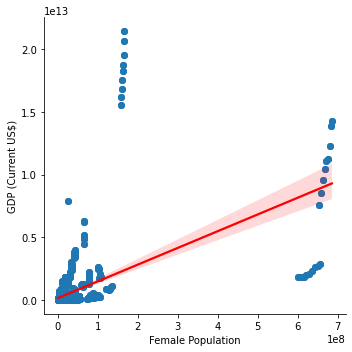

In [12]:
# create a scatterplot for the 'Female Population' and 'GDP' columns in seaborn

scatter2 = sns.lmplot(x = 'Female Population', y = 'GDP (Current US$)', data = sub, line_kws = {'color': 'red'})

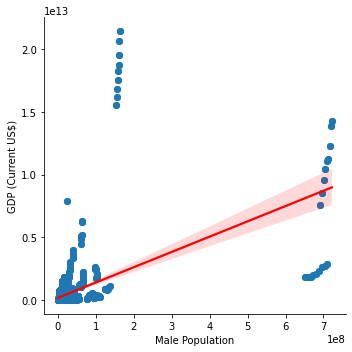

In [13]:
# create a scatterplot for the 'Male Population' and 'GDP' columns in seaborn

scatter3 = sns.lmplot(x = 'Male Population', y = 'GDP (Current US$)', data = sub, line_kws = {'color': 'red'})

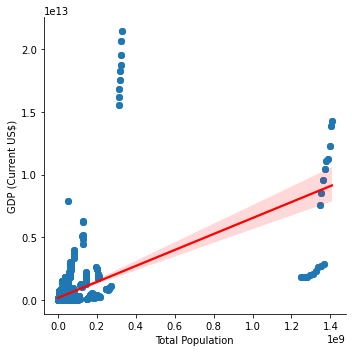

In [14]:
# create a scatterplot for the 'Total Population' and 'GDP' columns in seaborn

scatter4 = sns.lmplot(x = 'Total Population', y = 'GDP (Current US$)', data = sub, line_kws = {'color': 'red'})

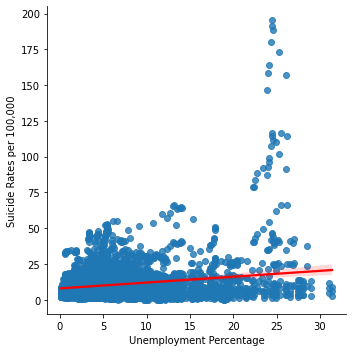

In [15]:
# create a scatterplot for the 'Unemployment Percentage' and 'Suicide Rates' columns in seaborn

scatter1 = sns.lmplot(x = 'Unemployment Percentage', y = 'Suicide Rates per 100,000', data = sub, line_kws = {'color': 'red'})

All 3 population plots (female, male & total) look extremely similar, with the trend line in the female population plot slightly higher than the other 2. There are many outliers in these graphs, suggesting a non-linear relationship between population and GDP. However, the trend line is demonstrating a strong positive relationship. This can be interpreted as GDP does increase as a population increases (makes sense as more people are contributing to the countries production output), however, this relationship is not linear and having the largest population doesn't necessarily mean having the largest GDP figures.

The unemployment vs suicide rate plot demonstrates a weak positive relationship. However, there is a great deal of variability as the data points are not clustered around the trendline, and there are many outliers. The relationship between the 2 variables is non-linear, as the data points decrease as the unemployment rate increases, up until approximately the 23% mark where it increases to its highest point, and decreases again. This explains the low correlation coefficient.

### Pair plot

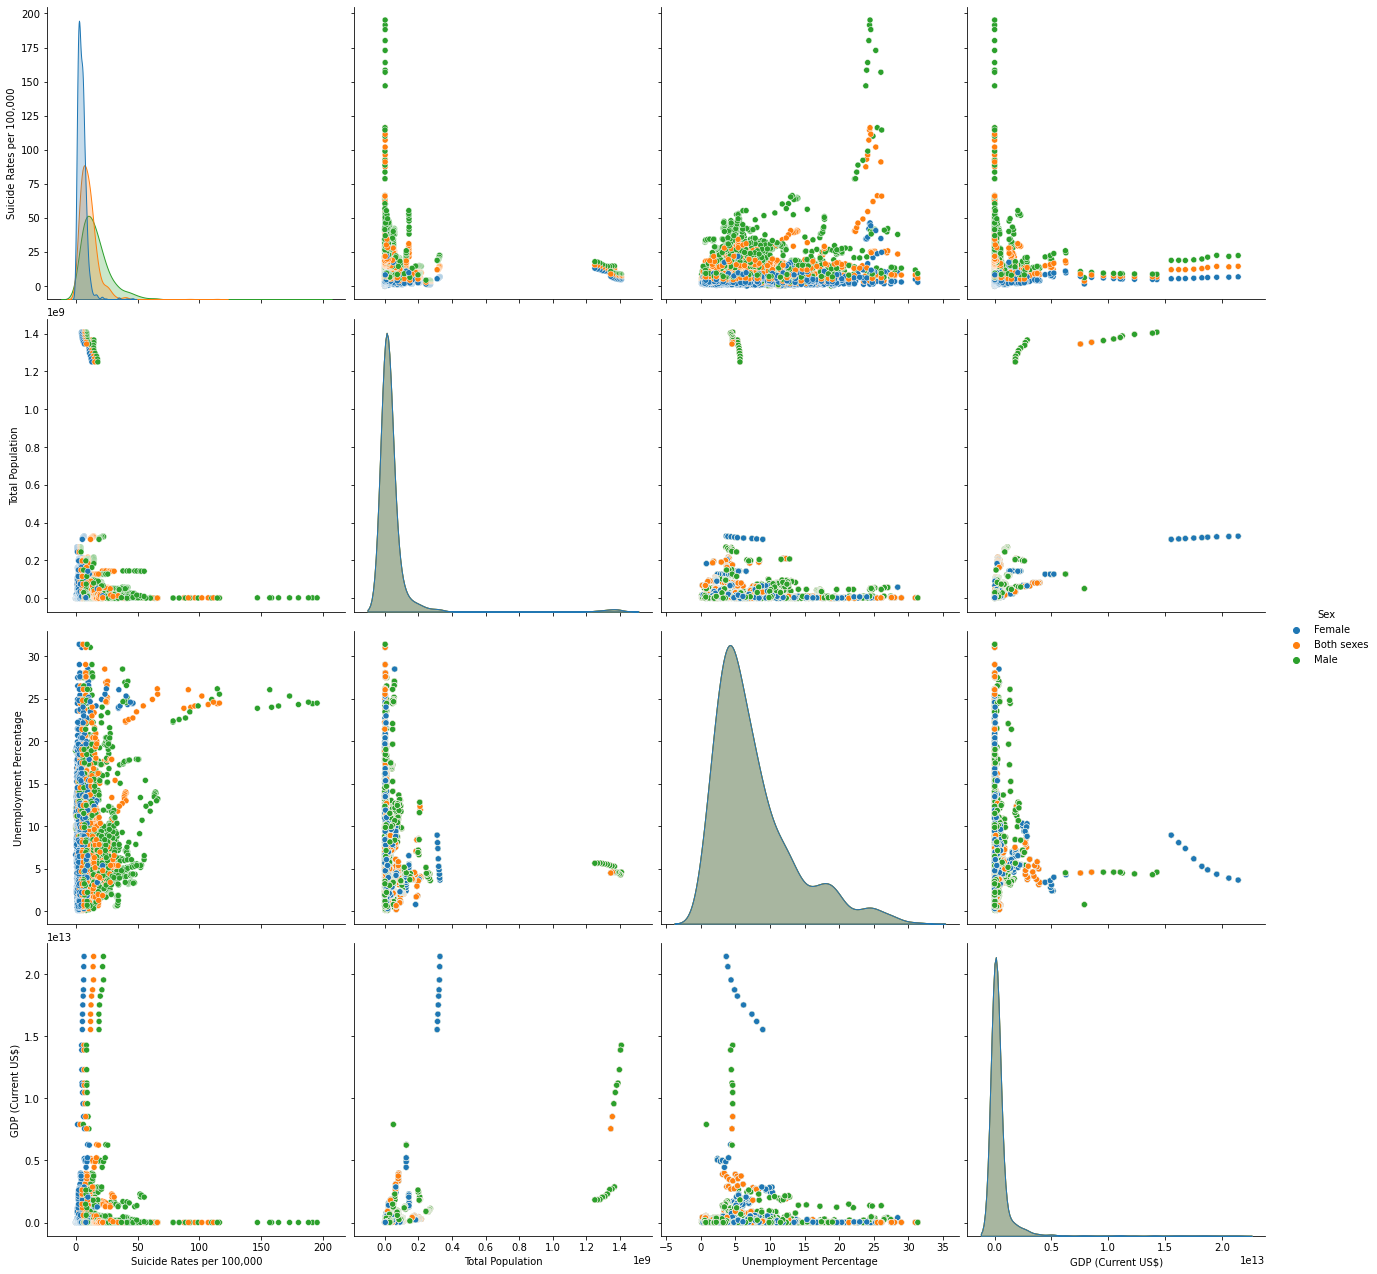

In [16]:
pp = sns.pairplot(sub,
                 vars = ['Suicide Rates per 100,000', 'Total Population', 'Unemployment Percentage', 'GDP (Current US$)'], hue = 'Sex',
                 height = 4.5)

These graphs all demonstrate that each of the relationships are non-linear, and have no strong patterns or trends, further supporting the results of the correlation heat map. 
Of interest is that suicides rates are greatest in countries where GDP is low, and gradually decreases as the GDP increases. Of note to investigate further is the relationship between suicide rates and GDP - suicide rates are remarkably higher in lower GDP output countries, and decreases drastically as GDP increases. However, at the higher end of the GDP output, the suicide rate increases again. Suicide rates are also much higher in less populated countries.

### Categorical plot

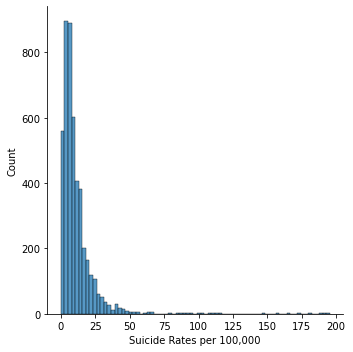

In [17]:
# create a histogram to visualise the distribution of the variables

sns.displot(sub['Suicide Rates per 100,000'], bins = 75)

In [18]:
# create 'low likelihood' category for new 'Suicide likelihood' column

sub.loc[sub['Suicide Rates per 100,000'] < 5, 'Suicide likelihood'] = 'Low likelihood'

C:\Users\Odette\anaconda3\lib\site-packages\pandas\core\indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
C:\Users\Odette\anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [19]:
# create 'Medium likelihood' category for new 'Suicide likelihood' column

sub.loc[(sub['Suicide Rates per 100,000'] >= 5) & (sub['Suicide Rates per 100,000'] < 10), 'Suicide likelihood'] = 'Medium likelihood'

In [20]:
# create 'High likelihood' category for new 'Suicide likelihood' column

sub.loc[sub['Suicide Rates per 100,000'] >= 10, 'Suicide likelihood'] = 'High likelihood'

In [21]:
sub['Suicide likelihood'].value_counts(dropna = False)

High likelihood      1784
Medium likelihood    1500
Low likelihood       1360
Name: Suicide likelihood, dtype: int64

In [22]:
sub.columns

Index(['Region', 'Country', 'Sex', 'Suicide Rates per 100,000',
       'Female Population', 'Male Population', 'Total Population',
       'Unemployment Percentage', 'GDP (Current US$)', 'Suicide likelihood'],
      dtype='object')

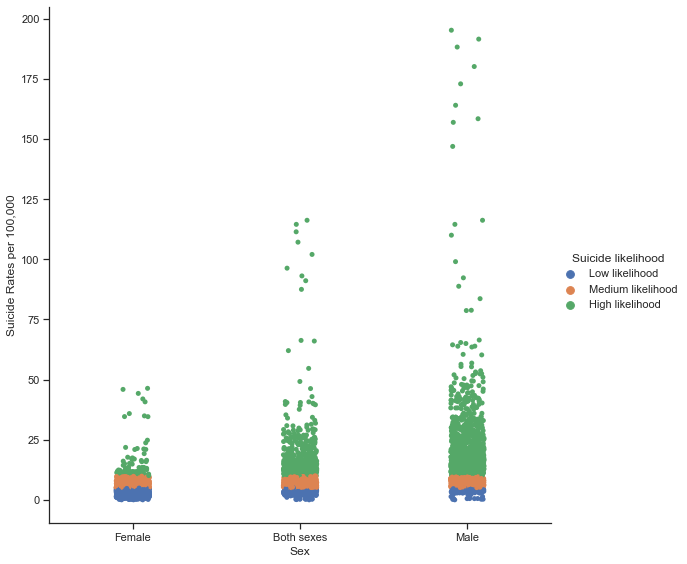

In [23]:
# create a categorical plot in seaborn using the suicide likelihood categories

sns.set(style = 'ticks')
g = sns.catplot(x = 'Sex', y = 'Suicide Rates per 100,000', hue = 'Suicide likelihood', data = sub, height = 8)

This categorical plot demonstrates that males have a higher suicide rate than females, and have a (very) high likelihood of committing suicide (and drive up the rate in their countries) than females. Although the number of males and females that fall into the medium likelihood of suicide category are similar, there are noticeably more females in this category.

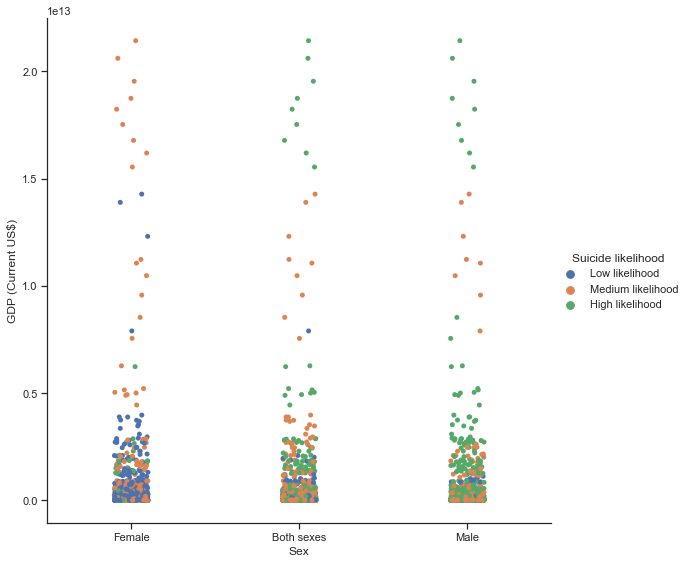

In [24]:
# create a categorical plot in seaborn using the suicide likelihood categories

sns.set(style = 'ticks')
g = sns.catplot(x = 'Sex', y = 'GDP (Current US$)', hue = 'Suicide likelihood', data = sub, height = 8)

There is no clear distribution pattern in this plot. We can glean that there is a higher frequency of females in the low likelihood of suicide category the lower the GDP is. There is only a small probablilty of a high likelihood of suicide amongst females, and they are centred around lower GDP. The higher the GDP, the more of a medium likelihood of suicide amonst females, but a high likelihood for males. Contrastingly, males have a cluster of high and medium likelihood suicide rates the lower the GDP, with very few that fall into the low likelihood category.
Although it can be hypothesised that a lower GDP output would mean a higher suicide likelihood, there is stark difference between the suicide likelihood of males and females.

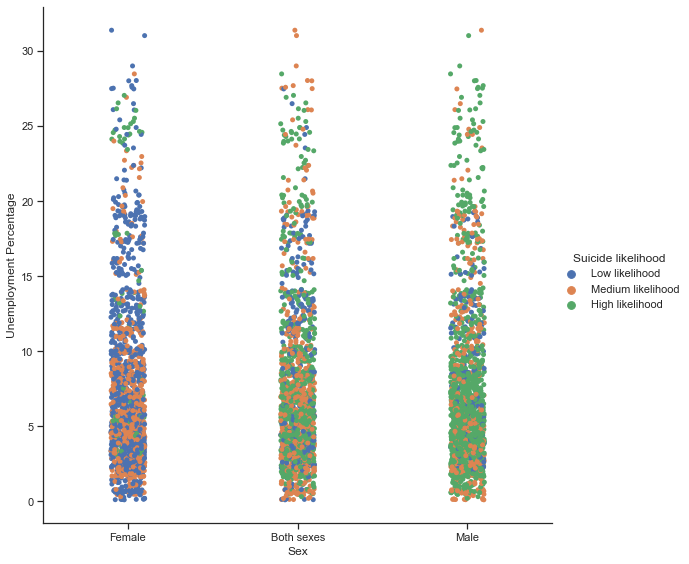

In [25]:
# create a categorical plot in seaborn using the suicide likelihood categories

sns.set(style = 'ticks')
g = sns.catplot(x = 'Sex', y = 'Unemployment Percentage', hue = 'Suicide likelihood', data = sub, height = 8)

There is a strong cluster of suicides for both females and males from 0-14% unemployment. Males also account for a higher likelihood of committing suicide than females regardless of the unemployment rate. 

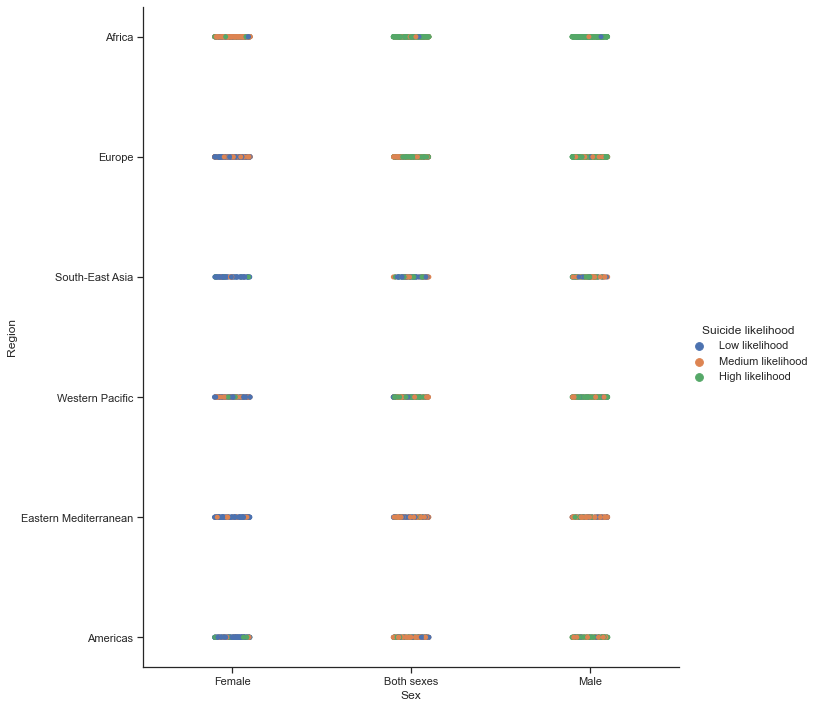

In [26]:
# create a categorical plot in seaborn using the suicide likelihood categories

sns.set(style = 'ticks')
g = sns.catplot(x = 'Sex', y = 'Region', hue = 'Suicide likelihood', data = sub, height = 10)

All regions demonstrate a higher likelihood of males to commit suicide than females. 
Africa accounts for the highest likelihood of suicide amongst males across all regions. All other regions show a high frequncy of both medium and high likelihoods of suicide for males.
Africa also has the highest frequency of a medium likelihood of suicide amongst females. South East Asia has the highest frequency of females with a high likelihood of suicide, and Eastern Mediterranean demonstrates the lowest likelihood of suicide amongst females. 
For both sexes, Africa has the highest frequency of a high likelihood of suicide, followed by Europe and Western Pacific

## Answers to initial questions

**What region has the highest suicide rates? And the lowest?**

Although it's difficult to interpret what region has the highest and lowest suicide rates, we can see that Africa has the highest likelihood of suicide of all the regions. South East Asia & Eastern Mediterranean have the lowest likelihod of suicide across both sexes.
<br>
<br>
_Still need to look at actual numbers between the regions and compare them_

**Do countries with higher unemployment rates have higher suicide rates?**

Although there are higher frequencies of suicides as unemployment increases, the highest suicide rates are acheived just before the highest unemployment rates. The highest rates of suicide occur around the ~27% unemployment mark, however, the highest rate of unemployment is ~32%

**Do countries with lower GDP have higher suicide rates?**			

Yes, this is the case. Suicides peak at lower GDP outputs, and decreases as GDP increases. However, at the very highest GDP outputs, suicide rates increase again.

**Is there a significant difference in suicide rates between the sexes?**

As the categorical plot demonstrated, males have a much higher suicide rate than females. Males also have a much higher likelihood of committing suicide than women.

## New questions to investigate

1. Why do males have a significantly higher suicide rate than females?
2. Do men have a higher suicide rate than women in all countries?
3. Why does Africa have the highest likelihood of suicide than all other regions?
4. What are the differences in suicide numbers between regions?
5. What 5 countries have the highest suicide rates? The bottom 5 countries? Ranked by males, females, and total population.
6. Why is there a higher cluster of suicides around lower unemployment rates than there are when the unemployment rate is higher?

## Potential hypotheses

**Hypothesis 1**

H0 = Countries with a higher proportion of females have higher suicide rates <br>
H1 = Countries with a higher proportion of males have higher suicide rates

**Hypothesis 2**

H0 = Countries with higher populations have higher suicide rates<br>
H1 = Countries with lower populations have higher suicide rates

**Hypothesis 3**

H0 = Africa has the lowest suicide rate of all regions<br>
H1 = Africa has the highest suicide rate of all regions

# Export dataframe

In [28]:
# exporting sub dataframe as “Suicide_data viz subset.csv”

sub.to_csv(os.path.join(path, 'Prepared Data', 'Suicide_data viz subset.csv'), index = False)